**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTEN
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_excel("/content/drive/MyDrive/data analysis/car.xlsx")
df.sample(2)

,buying price,maintenance cost,number of doors,number of persons,lug boot,safety,class
213,vhigh,high,5more,more,big,low,unacc
401,vhigh,low,4,more,med,high,acc


**Checking for missing values**

In [3]:
df.isnull().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
lug boot             0
safety               0
class                0
dtype: int64

**There are no missing values**

**Checking for and removing duplicates (if any)**

In [4]:
print (df.shape)
df = df.drop_duplicates()
print (df.shape)

(1728, 7)
(1728, 7)


**No duplicates found**

In [5]:
df['number of doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: number of doors, dtype: int64

In [6]:
df['number of persons'].value_counts()

2       576
4       576
more    576
Name: number of persons, dtype: int64

**Since the columns "number of doors" and "number of persons" are discrete variables, therefore, they should be converted to categorical data type**

In [7]:
df.replace ({"number of doors": {2: 'two', 3:'three', 4: 'four', "5more" : 'five or more'}}, inplace = True)
df.replace ({"number of persons": {2: 'two', 4: 'four'}}, inplace = True)

In [8]:
print (df['number of doors'].value_counts())
print (df['number of persons'].value_counts())

two             432
three           432
four            432
five or more    432
Name: number of doors, dtype: int64
two     576
four    576
more    576
Name: number of persons, dtype: int64


**Checking data types of columns**

In [9]:
df.dtypes

buying price         object
maintenance cost     object
number of doors      object
number of persons    object
lug boot             object
safety               object
class                object
dtype: object

**Checking for class distribution in the target column to see if the dataset is balanced or imbalanaced**

In [10]:
df['class'].value_counts(normalize=True)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

**The dataset is highly imbalanced, so we're gonna have to oversampling**

**Converting the various classes in the target column to integer type**

In [11]:
df.replace ({"class": {'unacc' : 0, 'acc': 1, 'good': 2, 'vgood': 3}}, inplace = True)

**Converting categorical features from 'object' to 'category' data type for classification models**

In [12]:
categorical_features = ['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug boot', 'safety']
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

**Separating dependent and independent featues**

In [13]:
x = df.drop('class', axis=1)
y = df['class']

**Applying the appropriate oversampling technique just for training the model (not for data analysis)**

In [14]:
os = SMOTEN()
x_os, y_os = os.fit_resample(x, y)

**Checking for class distribution in the oversampled data**

In [15]:
y_os.value_counts(normalize=True)

0    0.25
1    0.25
3    0.25
2    0.25
Name: class, dtype: float64

**The dataset is now balanced**

**Making train and test splits**

In [16]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, test_size=0.2, random_state=0, stratify = y_os)

**Creating an XGBoost model with categorical features specified, model training and evaluation**

In [17]:
xg = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xg.fit(x_train_os, y_train_os, verbose=True)

y_pred_train_os = xg.predict (x_train_os)
y_pred_test_os  = xg.predict (x_test_os)

training_data_accuracy = accuracy_score(y_pred_train_os, y_train_os)
print ("Accuracy On Training Data:", training_data_accuracy*100)

test_data_accuracy = accuracy_score(y_pred_test_os, y_test_os)
print ("Accuracy On Test Data:", test_data_accuracy*100)

print ("Correct predictions on training data:", sum (y_train_os == y_pred_train_os))
print ("Incorrect predictions on training data:", sum (y_train_os != y_pred_train_os))

print ("Correct predictions on test data:", sum (y_test_os == y_pred_test_os))
print ("Incorrect predictions on test data:", sum (y_test_os != y_pred_test_os))

print ("F1 Score on training data:", f1_score(y_train_os, y_pred_train_os, average = 'weighted'))
print ("F1 Score on test data:", f1_score(y_test_os, y_pred_test_os, average = 'weighted'))

print('Precision on training data: %.3f' % precision_score(y_train_os, y_pred_train_os, average = 'weighted'))
print('Precision on test data: %.3f' % precision_score(y_test_os, y_pred_test_os, average = 'weighted'))

print('Recall on training data: %.3f' % recall_score(y_train_os, y_pred_train_os, average = 'weighted'))
print('Recall on test data: %.3f' % recall_score(y_test_os, y_pred_test_os, average = 'weighted'))

print ("Confusion Matrix of training data:\n", confusion_matrix(y_train_os , y_pred_train_os))
print ("Confusion Matrix of test data:\n", confusion_matrix(y_test_os , y_pred_test_os))

print ("Classification Report Of Training Data:\n", classification_report (y_train_os, y_pred_train_os, digits = 4))
print ("Classification Report Of Test Data:\n", classification_report (y_test_os, y_pred_test_os, digits = 4))

Accuracy On Training Data: 98.83780991735537
Accuracy On Test Data: 99.07024793388429
Correct predictions on training data: 3827
Incorrect predictions on training data: 45
Correct predictions on test data: 959
Incorrect predictions on test data: 9
F1 Score on training data: 0.9883839825165132
F1 Score on test data: 0.9907003706851544
Precision on training data: 0.989
Precision on test data: 0.991
Recall on training data: 0.988
Recall on test data: 0.991
Confusion Matrix of training data:
 [[937  31   0   0]
 [  1 959   6   2]
 [  0   1 967   0]
 [  0   1   3 964]]
Confusion Matrix of test data:
 [[234   8   0   0]
 [  0 241   0   1]
 [  0   0 242   0]
 [  0   0   0 242]]
Classification Report Of Training Data:
               precision    recall  f1-score   support

           0     0.9989    0.9680    0.9832       968
           1     0.9667    0.9907    0.9786       968
           2     0.9908    0.9990    0.9949       968
           3     0.9979    0.9959    0.9969       968

    acc

**We got a good model but the objective here is data analysis, so we'll have to work with the original dataset since working with the oversampled dataset can introduce biases and distort the true representation of the underlying data**

**Making train and test splits of the original dataset**

In [18]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state=0, stratify = y)

**Creating a new xgboost model with categorical features specified, training it on the original dataset and evaluations**

In [19]:
xgb = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xgb.fit(x_train, y_train, verbose=True)

y_pred_train = xgb.predict (x_train)
y_pred_test  = xgb.predict (x_test)

training_data_accuracy = accuracy_score(y_pred_train, y_train)
print ("Accuracy On Training Data:", training_data_accuracy*100)

test_data_accuracy = accuracy_score(y_pred_test, y_test)
print ("Accuracy On Test Data:", test_data_accuracy*100)

print ("Correct predictions on training data:", sum (y_train == y_pred_train))
print ("Incorrect predictions on training data:", sum (y_train != y_pred_train))

print ("Correct predictions on test data:", sum (y_test == y_pred_test))
print ("Incorrect predictions on test data:", sum (y_test != y_pred_test))

print ("F1 Score on training data:", f1_score(y_train, y_pred_train, average = 'weighted'))
print ("F1 Score on test data:", f1_score(y_test, y_pred_test, average = 'weighted'))

print('Precision on training data: %.3f' % precision_score(y_train, y_pred_train, average = 'weighted'))
print('Precision on test data: %.3f' % precision_score(y_test, y_pred_test, average = 'weighted'))

print('Recall on training data: %.3f' % recall_score(y_train, y_pred_train, average = 'weighted'))
print('Recall on test data: %.3f' % recall_score(y_test, y_pred_test, average = 'weighted'))

print ("Confusion Matrix of training data:\n", confusion_matrix(y_train , y_pred_train))
print ("Confusion Matrix of test data:\n", confusion_matrix(y_test , y_pred_test))

print ("Classification Report Of Training Data:\n", classification_report (y_train, y_pred_train, digits = 4))
print ("Classification Report Of Test Data:\n", classification_report (y_test, y_pred_test, digits = 4))

Accuracy On Training Data: 97.9739507959479
Accuracy On Test Data: 96.82080924855492
Correct predictions on training data: 1354
Incorrect predictions on training data: 28
Correct predictions on test data: 335
Incorrect predictions on test data: 11
F1 Score on training data: 0.9799944904120347
F1 Score on test data: 0.968260748079976
Precision on training data: 0.981
Precision on test data: 0.969
Recall on training data: 0.980
Recall on test data: 0.968
Confusion Matrix of training data:
 [[954  14   0   0]
 [  0 298   8   1]
 [  0   1  50   4]
 [  0   0   0  52]]
Confusion Matrix of test data:
 [[237   5   0   0]
 [  1  75   1   0]
 [  0   1  11   2]
 [  0   1   0  12]]
Classification Report Of Training Data:
               precision    recall  f1-score   support

           0     1.0000    0.9855    0.9927       968
           1     0.9521    0.9707    0.9613       307
           2     0.8621    0.9091    0.8850        55
           3     0.9123    1.0000    0.9541        52

    accu

**Getting feature importances from trained model**

In [20]:
feature_importances_xgb = xgb.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances_xgb*100})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)
print(importance_df_xgb)

             Feature  Importance
3  number of persons   38.301147
5             safety   23.498472
0       buying price   14.056401
1   maintenance cost   11.770155
4           lug boot    8.274761
2    number of doors    4.099063


**Seems like the model has given the most importance to the feature "number of persons, followed by safety, buying price, maintenance cost, lug boot and then number of doors**

In [21]:
imp = importance_df_xgb['Feature'].values
imp

array(['number of persons', 'safety', 'buying price', 'maintenance cost',
       'lug boot', 'number of doors'], dtype=object)

**Univariate Data Analysis**

<Axes: xlabel='Buying Prices', ylabel=' Count'>

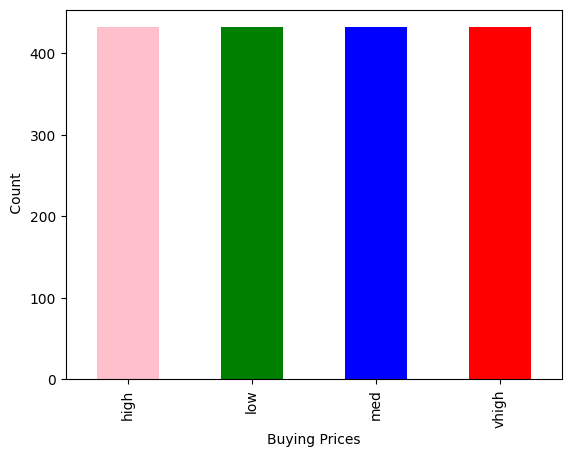

In [22]:
colors = ['pink', 'green', 'blue', 'red']
df['buying price'].value_counts().sort_values(ascending=True).plot(kind='bar', color = colors, xlabel = 'Buying Prices', ylabel = ' Count')

**Same number of samples were found for all the four types of buying prices, "high", "low", "medium" and "very high"**

<Axes: xlabel='Maintenance Costs', ylabel=' Count'>

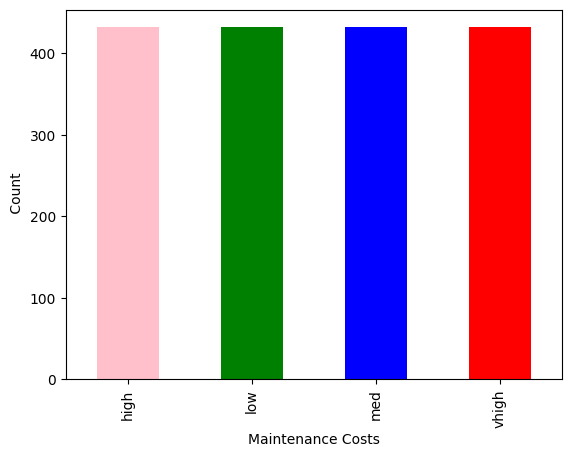

In [23]:
colors = ['pink', 'green', 'blue', 'red']
df['maintenance cost'].value_counts().sort_values(ascending=True).plot(kind='bar', color = colors, xlabel = 'Maintenance Costs', ylabel = ' Count')

**Same number of samples were found for all the four types of maintenance costs, "high", "low", "medium" and "very high"**

<Axes: xlabel='Number Of Doors', ylabel=' Count'>

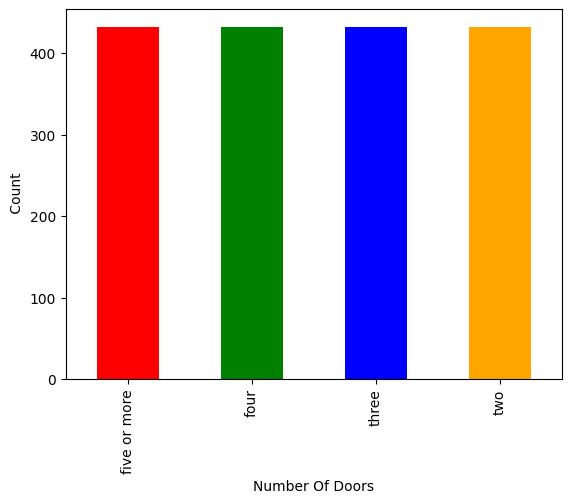

In [24]:
colors = ['red', 'green', 'blue', 'orange']
df['number of doors'].value_counts().sort_values(ascending=True).plot(kind='bar', color = colors, xlabel = 'Number Of Doors', ylabel = ' Count')

**Same number of samples were found for all the four categories of "number of doors", "two", "three", "four" and "five or more"**

<Axes: xlabel='Numbe Of Persons', ylabel=' Count'>

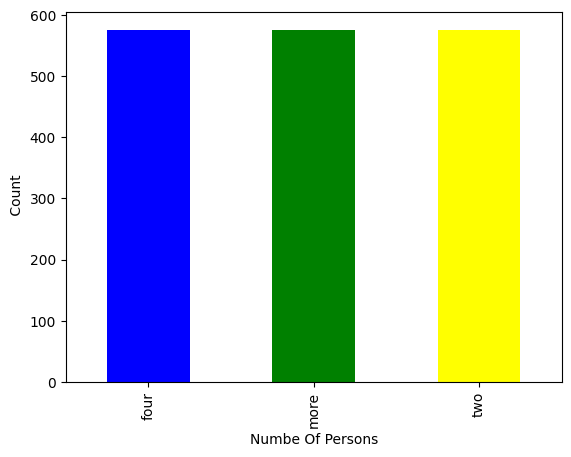

In [25]:
colors = ['blue', 'green', 'yellow']
df['number of persons'].value_counts().sort_values(ascending=True).plot(kind='bar', color = colors, xlabel = 'Numbe Of Persons', ylabel = ' Count')

**Same number of samples were found for all the three categories of "number of persons", "two", "four", and "more"**

<Axes: xlabel='Lug Boot Sizes', ylabel=' Count'>

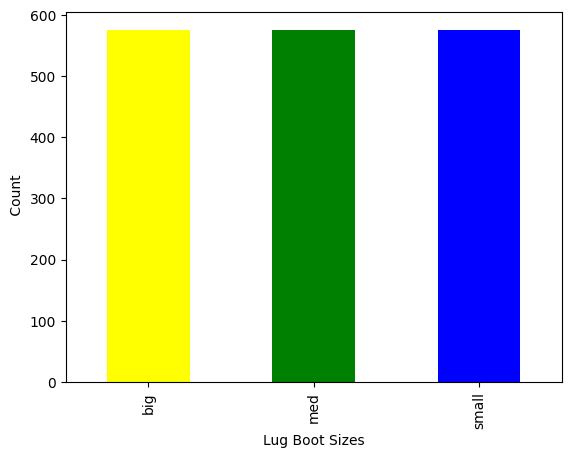

In [26]:
colors = ['yellow', 'green', 'blue']
df['lug boot'].value_counts().sort_values(ascending=True).plot(kind='bar', color = colors, xlabel = 'Lug Boot Sizes', ylabel = ' Count')

**Same number of samples were found for all the three categories of "lug boots", "big", "medium", and "small"**

<Axes: xlabel='Safety Levels', ylabel=' Count'>

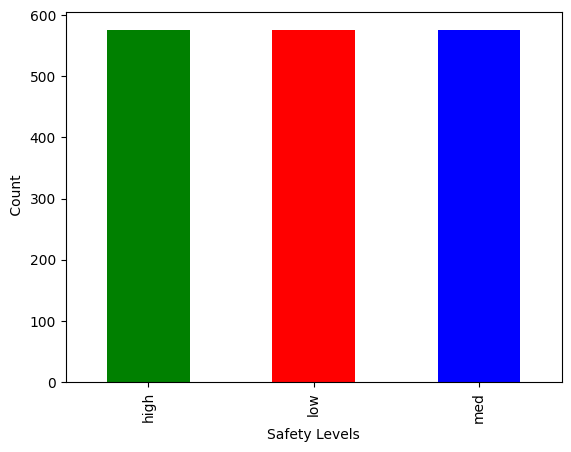

In [27]:
colors = ['green', 'red', 'blue']
df['safety'].value_counts().sort_values(ascending=True).plot(kind='bar', color = colors, xlabel = 'Safety Levels', ylabel = ' Count')

**Same number of samples were found for all the three categories of "safeties", "high", "low", and "medium"**

**After univariate analysis, it's evident that each category within every feature has an equal number of samples. This could be a result of intentional, careful data collection to ensure balance for analytical fairness. Alternatively, the equal distribution might be coincidental, though this seems unlikely in natural processes. Further investigation into the dataset's documentation is needed to understand the reasons behind this balance, influencing subsequent analyses and modeling decisions.**

**Converting the classes back to categorical values for data analysis**

In [28]:
df.replace ({"class": {0: 'unacc', 1: 'acc', 2 : 'good', 3: 'vgood'}}, inplace = True)

**Performing statistical tests to find the relationship between dependent and independent features**

In [29]:
df['class'] = df['class'].astype('category')

In [30]:
dependent_feature = 'class'

categorical_columns = ['buying price', 'maintenance cost', 'number of doors', 'number of persons', 'lug boot', 'safety']

processed_pairs = set()

cat_rel = []

for cat_col in categorical_columns:
    contingency_table = pd.crosstab(df[cat_col], df[dependent_feature])
    try:
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        if p_value < 0.05:
            cat_rel.append({"independent_feature": cat_col, "dependent_feature": dependent_feature, "p": p_value})
            print(f"Significant relationship found between {cat_col} and {dependent_feature}.")
        else:
            print(f"No significant relationship found between {cat_col} and {dependent_feature}.")
    except:
        pass

cat_rel_df = pd.DataFrame(cat_rel)

Significant relationship found between buying price and class.
Significant relationship found between maintenance cost and class.
No significant relationship found between number of doors and class.
Significant relationship found between number of persons and class.
Significant relationship found between lug boot and class.
Significant relationship found between safety and class.


**Sorting the dataframe in ascending order**

In [31]:
cat_rel_df.sort_values(by = 'p', ascending = True)

,independent_feature,dependent_feature,p
4,safety,class,2.389155e-100
2,number of persons,class,4.039968e-77
0,buying price,class,5.928063e-36
1,maintenance cost,class,2.547652e-26
3,lug boot,class,1.029440e-09


**In this case, the lower the p-value, the stronger the relationship between the two variables. So, the strongest relationship with the output variable is found with "safety", followed by "number of persons", "buying price", "maintenance cost" and "lug boot".**

In [32]:
importance_df_xgb

,Feature,Importance
3,number of persons,38.301147
5,safety,23.498472
0,buying price,14.056401
1,maintenance cost,11.770155
4,lug boot,8.274761
2,number of doors,4.099063


**If we look at the feature importances given by xgboost, the results are not that different from what we just found after the chi square test of independence.**

**Strongest relationship with the target variable was found with the feature 'safety'. Starting data analysis with this feature**

**Making a pivot table and calculating percentages of the cars rated good and very good to draw conclusions about how they are related to the safety levels.**

In [34]:
pt_quality_with_safety = df.groupby (['safety', 'class'])['class'].count().unstack()
pt_quality_with_safety.sort_values(by = 'vgood', ascending = False)

class,acc,good,unacc,vgood
safety,,,,
high,204,30,277,65
low,0,0,576,0
med,180,39,357,0


In [35]:
pt_quality_with_safety['Percentage Of Cars Rated Very Good'] = ((pt_quality_with_safety['vgood']/pt_quality_with_safety['vgood'].sum())*100).round(0)
pt_quality_with_safety['Percentage Of Cars Rated Good'] = ((pt_quality_with_safety['good']/pt_quality_with_safety['good'].sum())*100).round(0)
pt_quality_with_safety.sort_values(by = 'Percentage Of Cars Rated Very Good', ascending = False)

class,acc,good,unacc,vgood,Percentage Of Cars Rated Very Good,Percentage Of Cars Rated Good
safety,,,,,,
high,204,30,277,65,100.0,43.0
low,0,0,576,0,0.0,0.0
med,180,39,357,0,0.0,57.0


<Axes: xlabel='Safety Levels', ylabel='Percentage Of Cars Rated Very Good'>

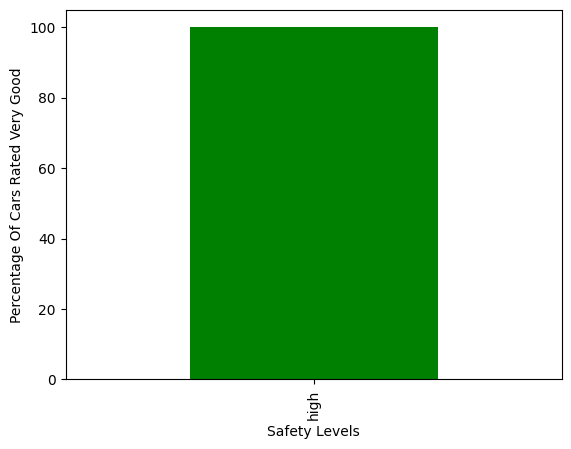

In [36]:
pt_quality_with_safety['Percentage Of Cars Rated Very Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Safety Levels', ylabel='Percentage Of Cars Rated Very Good', color='green')

<Axes: xlabel='Safety Levels', ylabel='Percentage Of Cars Rated Good'>

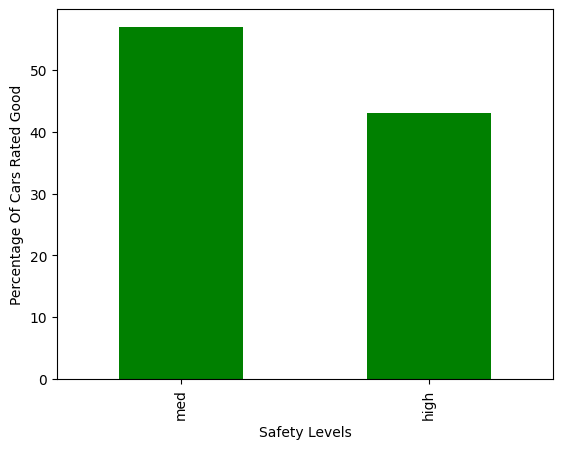

In [37]:
pt_quality_with_safety['Percentage Of Cars Rated Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Safety Levels', ylabel='Percentage Of Cars Rated Good', color='green')

**The above bar plots show that the higher the cars in safety, the better its quality. 100% of all the cars rated very good have a high safety whereas 57% of all the cars rated good have medium safety and 43% had high safety. Recommendations: Try making cars with higher safety levels to achieve a higer rating**

**Running sensitivity analysis**

In [38]:
df_for_sa = pd.concat([x, y], axis =1)

x_for_sa = df_for_sa.drop ('class', axis =1)
y_for_sa = df_for_sa['class']

x_train_for_sa, x_test_for_sa, y_train_for_sa, y_test_for_sa = train_test_split (x_for_sa, y_for_sa, test_size = 0.2, random_state = 2, stratify = y_for_sa)

In [39]:
xgb1 = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xgb1.fit(x_train_for_sa, y_train_for_sa, verbose=True)

scenarios = [0, 25, 50, 75, 100]

for scenario in scenarios:
    modified_x_test_for_sa = x_test_for_sa.copy()
    num = int(len(modified_x_test_for_sa) * (scenario / 100))

    indices_to_change = np.random.choice(
        modified_x_test_for_sa.index[modified_x_test_for_sa['safety'] == 'low'],
        num,
        replace=True)

    modified_x_test_for_sa.loc[indices_to_change, 'safety'] = 'high'

    y_pred_test_for_sa = xgb1.predict(modified_x_test_for_sa)

    f1 = f1_score(y_test_for_sa, y_pred_test_for_sa, average = 'weighted')
    report = classification_report(y_test_for_sa, y_pred_test_for_sa)

    print(f"Scenario: With {scenario}% Changes In More Than Low Safety Level To High Safety Level")
    print ("F1 Score:")
    print (f1)
    print("Classification Report:")
    print(report)
    print("=" * 50)

Scenario: With 0% Changes In More Than Low Safety Level To High Safety Level
F1 Score:
0.942098076470022
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.90      0.83      0.86        77
           2       0.44      0.79      0.56        14
           3       0.92      0.92      0.92        13

    accuracy                           0.94       346
   macro avg       0.82      0.88      0.84       346
weighted avg       0.95      0.94      0.94       346

Scenario: With 25% Changes In More Than Low Safety Level To High Safety Level
F1 Score:
0.8478600573397473
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       242
           1       0.67      0.83      0.74        77
           2       0.37      0.79      0.50        14
           3       0.60      0.92      0.73        13

    accuracy                       

**The results of sensitivity analysis show a considerable change when the safety levels are altered. This supports the observation made above that the higher the safety level of the car, the higher it is rated**

**After safety, strongest relationship with the target variable was found with the feature 'number of persons'.**

In [40]:
pt_quality_with_persons = df.groupby (['number of persons', 'class'])['class'].count().unstack()
pt_quality_with_persons.sort_values(by = 'vgood', ascending = False)

class,acc,good,unacc,vgood
number of persons,,,,
more,186,33,322,35
four,198,36,312,30
two,0,0,576,0


In [41]:
pt_quality_with_persons['Percentage Of Cars Rated Very Good'] = ((pt_quality_with_persons['vgood']/pt_quality_with_persons['vgood'].sum())*100).round(0)
pt_quality_with_persons['Percentage Of Cars Rated Good'] = ((pt_quality_with_persons['good']/pt_quality_with_persons['good'].sum())*100).round(0)
pt_quality_with_persons.sort_values(by = 'Percentage Of Cars Rated Very Good', ascending = False)

class,acc,good,unacc,vgood,Percentage Of Cars Rated Very Good,Percentage Of Cars Rated Good
number of persons,,,,,,
more,186,33,322,35,54.0,48.0
four,198,36,312,30,46.0,52.0
two,0,0,576,0,0.0,0.0


<Axes: xlabel='Number Of Persons', ylabel='Percentage Of Cars Rated Very Good'>

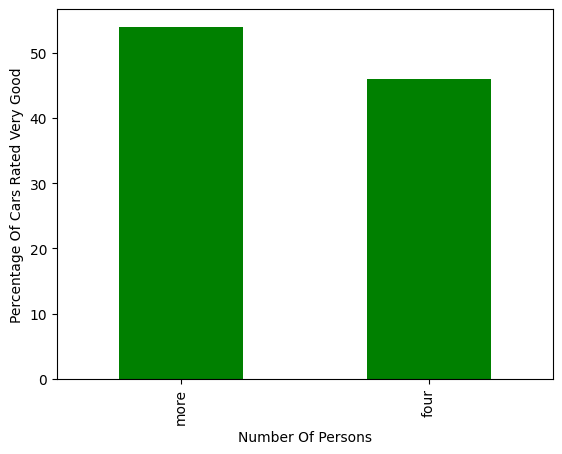

In [42]:
pt_quality_with_persons['Percentage Of Cars Rated Very Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Number Of Persons', ylabel='Percentage Of Cars Rated Very Good', color='green')

<Axes: xlabel='Number Of Persons', ylabel='Percentage Of Cars Rated Good'>

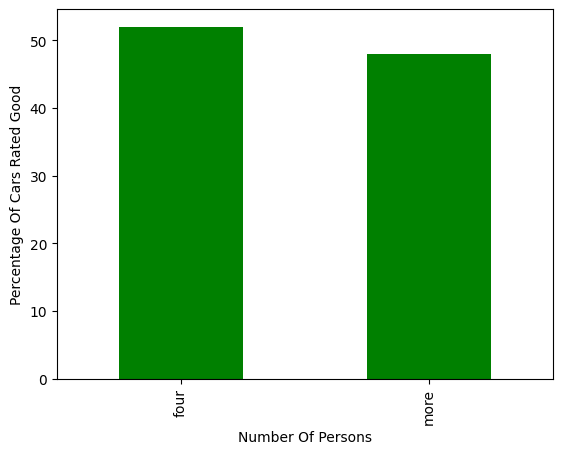

In [43]:
pt_quality_with_persons['Percentage Of Cars Rated Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Number Of Persons', ylabel='Percentage Of Cars Rated Good', color='green')

**The above bar plots show that the higher the number of people a car can accomodate the higher it is rated. 54% of all the cars rated very good can accomodate more than 4 persons and 46% can accomodate 4 persons whereas 52% of all the cars rated good can accomodate 4 persons and 48% can accomodate more than 4 persons. Recommendations: Try making cars that can accomodate 4 or more than 4 persons to achieve a higer rating.**

**Running sensitivity analysis**

In [44]:
xgb2 = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xgb2.fit(x_train_for_sa, y_train_for_sa, verbose=True)

scenarios = [0, 25, 50, 75, 100]

for scenario in scenarios:
    modified_x_test_for_sa = x_test_for_sa.copy()
    num = int(len(modified_x_test_for_sa) * (scenario / 100))

    indices_to_change = np.random.choice(
        modified_x_test_for_sa.index[modified_x_test_for_sa['number of persons'] == 'two'],
        num,
        replace=True)

    modified_x_test_for_sa.loc[indices_to_change, 'number of persons'] = 'more'

    y_pred_test_for_sa = xgb2.predict(modified_x_test_for_sa)

    f1 = f1_score(y_test_for_sa, y_pred_test_for_sa, average = 'weighted')
    report = classification_report(y_test_for_sa, y_pred_test_for_sa)

    print(f"Scenario: With {scenario}% Changes In Number Of Persons From Two To More")
    print("F1 Score:")
    print(f1)
    print("Classification Report:")
    print(report)
    print("=" * 50)

Scenario: With 0% Changes In Number Of Persons From Two To More
F1 Score:
0.942098076470022
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.90      0.83      0.86        77
           2       0.44      0.79      0.56        14
           3       0.92      0.92      0.92        13

    accuracy                           0.94       346
   macro avg       0.82      0.88      0.84       346
weighted avg       0.95      0.94      0.94       346

Scenario: With 25% Changes In Number Of Persons From Two To More
F1 Score:
0.8654130972402891
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       242
           1       0.70      0.83      0.76        77
           2       0.39      0.79      0.52        14
           3       0.67      0.92      0.77        13

    accuracy                           0.85       346
   macr

**The results of sensitivity analysis show a considerable change when the number of persons are altered. This supports the observation made earlier that the cars that can accomodate more people are rated higher.**

**The next feature that has the strongest relationship with the target variable is 'buying price'**

In [45]:
pt_quality_with_buying_price = df.groupby (['buying price', 'class'])['class'].count().unstack()
pt_quality_with_buying_price.sort_values(by = 'vgood', ascending = False)

class,acc,good,unacc,vgood
buying price,,,,
low,89,46,258,39
med,115,23,268,26
high,108,0,324,0
vhigh,72,0,360,0


In [46]:
pt_quality_with_buying_price['Percentage Of Cars Rated Very Good'] = ((pt_quality_with_buying_price['vgood']/pt_quality_with_buying_price['vgood'].sum())*100).round(0)
pt_quality_with_buying_price['Percentage Of Cars Rated Good'] = ((pt_quality_with_buying_price['good']/pt_quality_with_buying_price['good'].sum())*100).round(0)
pt_quality_with_buying_price.sort_values(by = 'Percentage Of Cars Rated Very Good', ascending = False)

class,acc,good,unacc,vgood,Percentage Of Cars Rated Very Good,Percentage Of Cars Rated Good
buying price,,,,,,
low,89,46,258,39,60.0,67.0
med,115,23,268,26,40.0,33.0
high,108,0,324,0,0.0,0.0
vhigh,72,0,360,0,0.0,0.0


<Axes: xlabel='Buying Prices', ylabel='Percentage Of Cars Rated Very Good'>

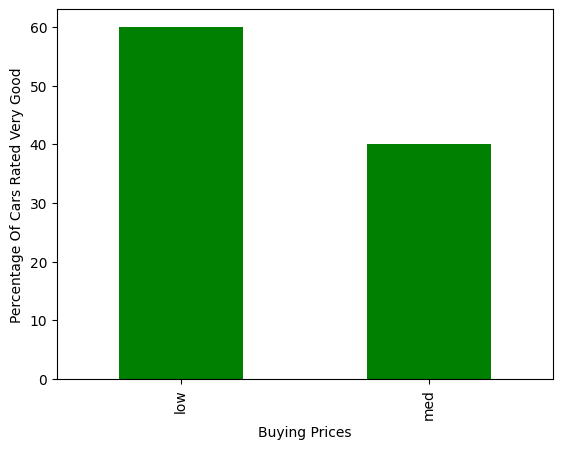

In [47]:
pt_quality_with_buying_price['Percentage Of Cars Rated Very Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Buying Prices', ylabel='Percentage Of Cars Rated Very Good', color='green')

<Axes: xlabel='Buying Prices', ylabel='Percentage Of Cars Rated Good'>

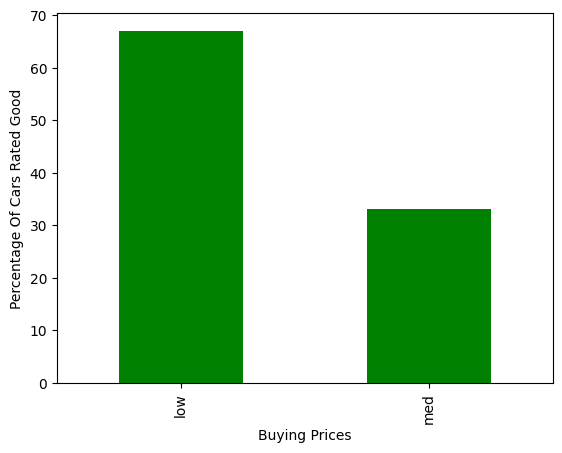

In [48]:
pt_quality_with_buying_price['Percentage Of Cars Rated Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Buying Prices', ylabel='Percentage Of Cars Rated Good', color='green')

**The above bar plots show that the lower the buying price of a car, the higher it is rated. 60% of all the cars rated very good had a low buying price and 40% had a medium buying price whereas 67% of all the cars rated good had low buying price and 33% had a medium buying price. This is surprising since is expected that the cars which have a higher price or buying price would be more durable and hence rated more. It is a moment of concern for the companies manufacturing expensive cars. Question: Are the expensive cars worth the price? It came to mind that maybe it is because the expensive cars are safe or they can accommodate less number of people and since these are the two features with the strongest relationship with target variable, that's why this is happening. Therefore, pivot tables were made to verify this but it was surprisingly found that the data distribution was quite normal and expensive cars had their equal share (in terms of safety and number of persons) in making their way to be rated higher but they failed to do so. Recommendations: Focus on making cars with less prices instead of expensive ones. These cars tend to be rated better than the ones that are bought at higher price.**

In [49]:
xgb3 = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xgb3.fit(x_train_for_sa, y_train_for_sa, verbose=True)

scenarios = [0, 25, 50, 75, 100]

for scenario in scenarios:
    modified_x_test_for_sa = x_test_for_sa.copy()
    num = int(len(modified_x_test_for_sa) * (scenario / 100))

    indices_to_change = np.random.choice(
        modified_x_test_for_sa.index[modified_x_test_for_sa['buying price'] == 'vhigh'],
        num,
        replace=True)

    modified_x_test_for_sa.loc[indices_to_change, 'buying price'] = 'low'

    y_pred_test_for_sa = xgb3.predict(modified_x_test_for_sa)

    f1 = f1_score(y_test_for_sa, y_pred_test_for_sa, average = 'weighted')
    report = classification_report(y_test_for_sa, y_pred_test_for_sa)

    # Print results for the scenario
    print(f"Scenario: With {scenario}% Changes In Buying Price From Very High To Low")
    print("F1 Score:")
    print(f1)
    print("Classification Report:")
    print(report)
    print("=" * 50)

Scenario: With 0% Changes In Buying Price From Very High To Low
F1 Score:
0.942098076470022
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.90      0.83      0.86        77
           2       0.44      0.79      0.56        14
           3       0.92      0.92      0.92        13

    accuracy                           0.94       346
   macro avg       0.82      0.88      0.84       346
weighted avg       0.95      0.94      0.94       346

Scenario: With 25% Changes In Buying Price From Very High To Low
F1 Score:
0.8929021113441262
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       242
           1       0.77      0.71      0.74        77
           2       0.34      0.79      0.48        14
           3       0.75      0.92      0.83        13

    accuracy                           0.88       346
   macr

**The results of sensitivity analysis show a considerable change when the buying price is altered. This supports the observation made earlier that the cars with a lower buying price are rated higher.**

In [50]:
pt_quality_with_maintenance_cost = df.groupby (['maintenance cost', 'class'])['class'].count().unstack()
pt_quality_with_maintenance_cost.sort_values(by = 'vgood', ascending =False)

class,acc,good,unacc,vgood
maintenance cost,,,,
low,92,46,268,26
med,115,23,268,26
high,105,0,314,13
vhigh,72,0,360,0


In [51]:
pt_quality_with_maintenance_cost['Percentage Of Cars Rated Very Good'] = ((pt_quality_with_maintenance_cost['vgood']/pt_quality_with_maintenance_cost['vgood'].sum())*100).round(0)
pt_quality_with_maintenance_cost['Percentage Of Cars Rated Good'] = ((pt_quality_with_maintenance_cost['good']/pt_quality_with_maintenance_cost['good'].sum())*100).round(0)
pt_quality_with_maintenance_cost.sort_values(by = 'Percentage Of Cars Rated Very Good', ascending = False)

class,acc,good,unacc,vgood,Percentage Of Cars Rated Very Good,Percentage Of Cars Rated Good
maintenance cost,,,,,,
low,92,46,268,26,40.0,67.0
med,115,23,268,26,40.0,33.0
high,105,0,314,13,20.0,0.0
vhigh,72,0,360,0,0.0,0.0


<Axes: xlabel='Maintenance Prices', ylabel='Percentage Of Cars Rated Very Good'>

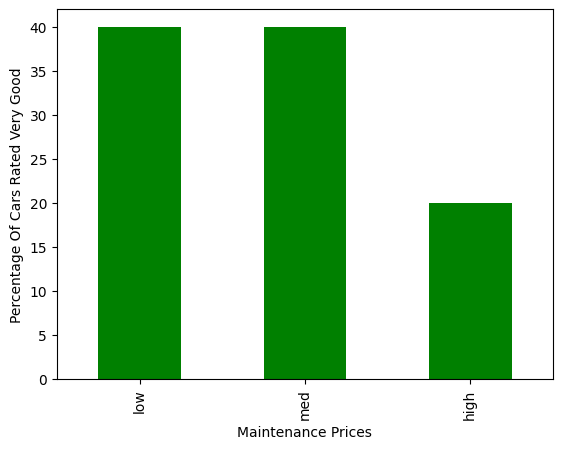

In [52]:
pt_quality_with_maintenance_cost['Percentage Of Cars Rated Very Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Maintenance Prices', ylabel='Percentage Of Cars Rated Very Good', color='green')

<Axes: xlabel='Maintenance Prices', ylabel='Percentage Of Cars Rated Good'>

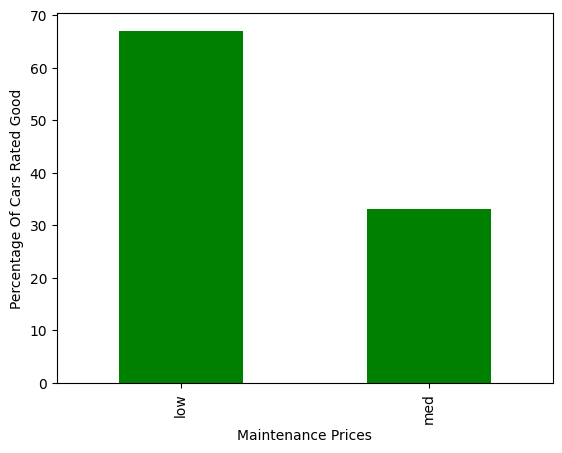

In [53]:
pt_quality_with_maintenance_cost['Percentage Of Cars Rated Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Maintenance Prices', ylabel='Percentage Of Cars Rated Good', color='green')

**The above bar plots show that the lower the maintenace price of a car, the higher it is rated. 40% of all the cars rated very good had a low maintenance price, 40% had a medium maintenace price and just 20% had a high maintenace cost whereas 67% of all the cars rated good had a low maintenace price and 33% had a medium buying price. This is not surprising since it is expected that the cars which have a higher maintenance price would be be a headache and result in extra expenses. Recommendations: Focus on making cars with less maintenance price since they tend to be rated better.**

**Sensitivity analysis**

In [54]:
xgb4 = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xgb4.fit(x_train_for_sa, y_train_for_sa, verbose=True)

scenarios = [0, 25, 50, 75, 100]

for scenario in scenarios:
    modified_x_test_for_sa = x_test_for_sa.copy()
    num = int(len(modified_x_test_for_sa) * (scenario / 100))

    indices_to_change = np.random.choice(
    modified_x_test_for_sa.index[(modified_x_test_for_sa['maintenance cost'] == 'low') | (modified_x_test_for_sa['maintenance cost'] == 'medium')],
    num,
    replace=True)

    modified_x_test_for_sa.loc[indices_to_change, 'maintenance cost'] = 'high'

    y_pred_test_for_sa = xgb4.predict(modified_x_test_for_sa)

    f1 = f1_score(y_test_for_sa, y_pred_test_for_sa, average = 'weighted')
    report = classification_report(y_test_for_sa, y_pred_test_for_sa)

    # Print results for the scenario
    print(f"Scenario: With {scenario}% Changes In Maintenance Cost From Low And Medium To High")
    print("F1 Score:")
    print(f1)
    print("Classification Report:")
    print(report)
    print("=" * 50)

Scenario: With 0% Changes In Maintenance Cost From Low And Medium To High
F1 Score:
0.942098076470022
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.90      0.83      0.86        77
           2       0.44      0.79      0.56        14
           3       0.92      0.92      0.92        13

    accuracy                           0.94       346
   macro avg       0.82      0.88      0.84       346
weighted avg       0.95      0.94      0.94       346

Scenario: With 25% Changes In Maintenance Cost From Low And Medium To High
F1 Score:
0.9219531230945587
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       242
           1       0.81      0.86      0.84        77
           2       0.43      0.43      0.43        14
           3       0.90      0.69      0.78        13

    accuracy                           0.

**The results of sensitivity analysis do not show a considerable change when the maintenance cost is altered. This rejects the observation made above that the lower the maintenance cost, the higher it is rated or in simpler terms: Maintenance cost doesn't have a significant relationship with the target variable. While there is a significant statistical relationship, the practical impact on the model's performance seems to be less pronounced.**

In [55]:
pt_quality_with_lug_boot = df.groupby (['lug boot', 'class'])['class'].count().unstack()
pt_quality_with_lug_boot.sort_values(by = 'vgood', ascending =False)

class,acc,good,unacc,vgood
lug boot,,,,
big,144,24,368,40
med,135,24,392,25
small,105,21,450,0


In [56]:
pt_quality_with_lug_boot['Percentage Of Cars Rated Very Good'] = ((pt_quality_with_lug_boot['vgood']/pt_quality_with_lug_boot['vgood'].sum())*100).round(0)
pt_quality_with_lug_boot['Percentage Of Cars Rated Good'] = ((pt_quality_with_lug_boot['good']/pt_quality_with_lug_boot['good'].sum())*100).round(0)
pt_quality_with_lug_boot.sort_values(by = 'Percentage Of Cars Rated Very Good', ascending = False)

class,acc,good,unacc,vgood,Percentage Of Cars Rated Very Good,Percentage Of Cars Rated Good
lug boot,,,,,,
big,144,24,368,40,62.0,35.0
med,135,24,392,25,38.0,35.0
small,105,21,450,0,0.0,30.0


<Axes: xlabel='Lug Boot Categories', ylabel='Percentage Of Cars Rated Very Good'>

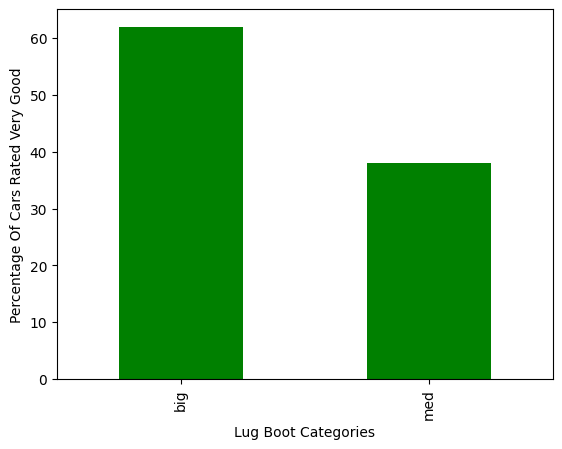

In [57]:
pt_quality_with_lug_boot['Percentage Of Cars Rated Very Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Lug Boot Categories', ylabel='Percentage Of Cars Rated Very Good', color='green')

<Axes: xlabel='Lug Boot Categories', ylabel='Percentage Of Cars Rated Good'>

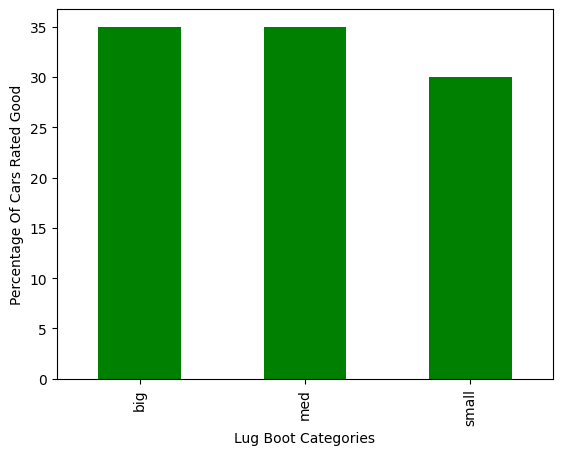

In [58]:
pt_quality_with_lug_boot['Percentage Of Cars Rated Good'].replace(0, float('nan')).sort_values(ascending=False).dropna().plot(kind='bar', xlabel='Lug Boot Categories', ylabel='Percentage Of Cars Rated Good', color='green')

**The bar plot above shows that the bigger the lug boot the higher the car is rated. Of all cars the rated very good, 62% had big lug boots and 38% had medium lug boots whereas of all cars the rated good, 35% had big lug boots, 35% had medium lug boots and 30% had small lug boots. Recommendations: Make cars with bigger lug boots to achieve higher ratings.**

In [59]:
xgb5 = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', enable_categorical=True, tree_method="hist", n_estimators=10)
xgb5.fit(x_train_for_sa, y_train_for_sa, verbose=True)

scenarios = [0, 25, 50, 75, 100]

for scenario in scenarios:
    modified_x_test_for_sa = x_test_for_sa.copy()
    num = int(len(modified_x_test_for_sa) * (scenario / 100))

    indices_to_change = np.random.choice(
        modified_x_test_for_sa.index[modified_x_test_for_sa['lug boot'] == 'big'],
        num,
        replace=True)

    modified_x_test_for_sa.loc[indices_to_change, 'lug boot'] = 'small'

    y_pred_test_for_sa = xgb5.predict(modified_x_test_for_sa)

    f1 = f1_score(y_test_for_sa, y_pred_test_for_sa, average = 'weighted')
    report = classification_report(y_test_for_sa, y_pred_test_for_sa)

    print(f"Scenario: With {scenario}% Changes In Lug Boot Size From Big To Small")
    print("F1 Score:")
    print(f1)
    print("Classification Report:")
    print(report)
    print("=" * 50)

Scenario: With 0% Changes In Lug Boot Size From Big To Small
F1 Score:
0.942098076470022
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       242
           1       0.90      0.83      0.86        77
           2       0.44      0.79      0.56        14
           3       0.92      0.92      0.92        13

    accuracy                           0.94       346
   macro avg       0.82      0.88      0.84       346
weighted avg       0.95      0.94      0.94       346

Scenario: With 25% Changes In Lug Boot Size From Big To Small
F1 Score:
0.9044682034663576
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       242
           1       0.90      0.69      0.78        77
           2       0.43      0.86      0.57        14
           3       0.91      0.77      0.83        13

    accuracy                           0.90       346
   macro avg 

**The results of sensitivity analysis show a considerable change when the lug boot size is altered. This supports the observation made earlier that the cars with a bigger lug boots price are rated higher.**

**Final conclusions and recommendations: Cars that have a higher safety level, can accomodate 4 or more people, have low buying price and have a bigger lug boot size are rated higher so try making cars with these specs to achieve a higher rating. Strongest relationship with the car rating was found with safety level, followed by number of persons it can accomodate, buying price and lug boot size.**